In [1]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
client_id = 'xxxxxxxxxx'
client_secret = 'xxxxxxxxxx'

client_credentials_manager = spotipy.oauth2.SpotifyClientCredentials(client_id, client_secret)
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Get Sora Amamiya information

In [24]:
# search artist and song id
search = spotify.search("雨宮天", limit=50, offset=0, type='track', market=None)
song = pd.DataFrame.from_dict(search["tracks"]["items"])
song_name = pd.DataFrame(song["name"])
song = pd.DataFrame(song["id"])

# get song information
song_info = pd.DataFrame()
for url in song["id"]:
    df = pd.DataFrame.from_dict(spotify.audio_features(url))
    song_info = song_info.append(df)

# drop unnecessary information 
song_info = song_info.reset_index(drop=True)
song_info = song_info.drop(columns=["analysis_url","id","track_href","type","uri"])

# name concat
song_info_all = pd.concat([song_name, song_info], axis=1)
song_info_all.head(30)

,name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,最高速 Fall in Love,0.018000,0.410,229638,0.954,0.000229,7,0.1770,-3.306,1,0.1260,174.971,4,0.291
1,奏(かなで),0.068800,0.512,307333,0.545,0.000000,3,0.0875,-6.058,1,0.0291,149.805,4,0.304
2,Da-Da-Dash!,0.002470,0.627,235629,0.709,0.000015,11,0.1090,-4.090,0,0.0603,92.494,4,0.432
3,最高速Fall in Love - ミーアver.,0.004780,0.428,230600,0.936,0.000000,7,0.1720,-4.289,1,0.0779,174.888,4,0.186
4,最高速Fall in Love,0.032100,0.438,227240,0.960,0.000015,4,0.2650,-3.548,0,0.0887,174.982,4,0.354
5,My Sweet Feelings,0.003310,0.617,260133,0.727,0.000358,8,0.2750,-5.785,0,0.0338,127.996,4,0.617
6,キスミーだぁりん▽,0.002180,0.532,221533,0.917,0.000161,5,0.3860,-5.311,1,0.0681,164.990,4,0.570
7,My Sweet Feelings,0.073500,0.648,257240,0.804,0.000007,8,0.2280,-5.275,0,0.0348,127.975,4,0.774
8,Da-Da-Dash!,0.010200,0.541,231240,0.795,0.000009,11,0.1080,-3.930,0,0.0970,184.973,4,0.682
9,最高速 Fall in Love - Instrumental,0.000018,0.376,229641,0.921,0.853000,7,0.2060,-6.497,1,0.0468,175.022,4,0.223


# Analysis

In [25]:
song_info.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0,17.000000
mean,0.082606,0.520588,235228.235294,0.748059,0.291930,6.705882,0.214265,-6.391176,0.588235,0.057718,150.239235,4.0,0.483647
std,0.229490,0.082320,42441.925280,0.204796,0.409852,3.423534,0.134091,2.743091,0.507300,0.028401,31.764612,0.0,0.223985
min,0.000008,0.376000,110240.000000,0.383000,0.000000,0.000000,0.083500,-13.726000,0.000000,0.026300,74.978000,4.0,0.174000
25%,0.000874,0.446000,221533.000000,0.564000,0.000007,4.000000,0.108000,-7.854000,0.000000,0.034800,128.023000,4.0,0.291000
50%,0.004780,0.522000,230600.000000,0.795000,0.000161,7.000000,0.177000,-5.785000,1.000000,0.046800,164.939000,4.0,0.491000
75%,0.032100,0.569000,257240.000000,0.936000,0.771000,10.000000,0.275000,-4.217000,1.000000,0.074500,174.971000,4.0,0.682000
max,0.950000,0.648000,307333.000000,0.975000,0.922000,11.000000,0.556000,-3.306000,1.000000,0.126000,184.978000,4.0,0.797000


## Catter plot

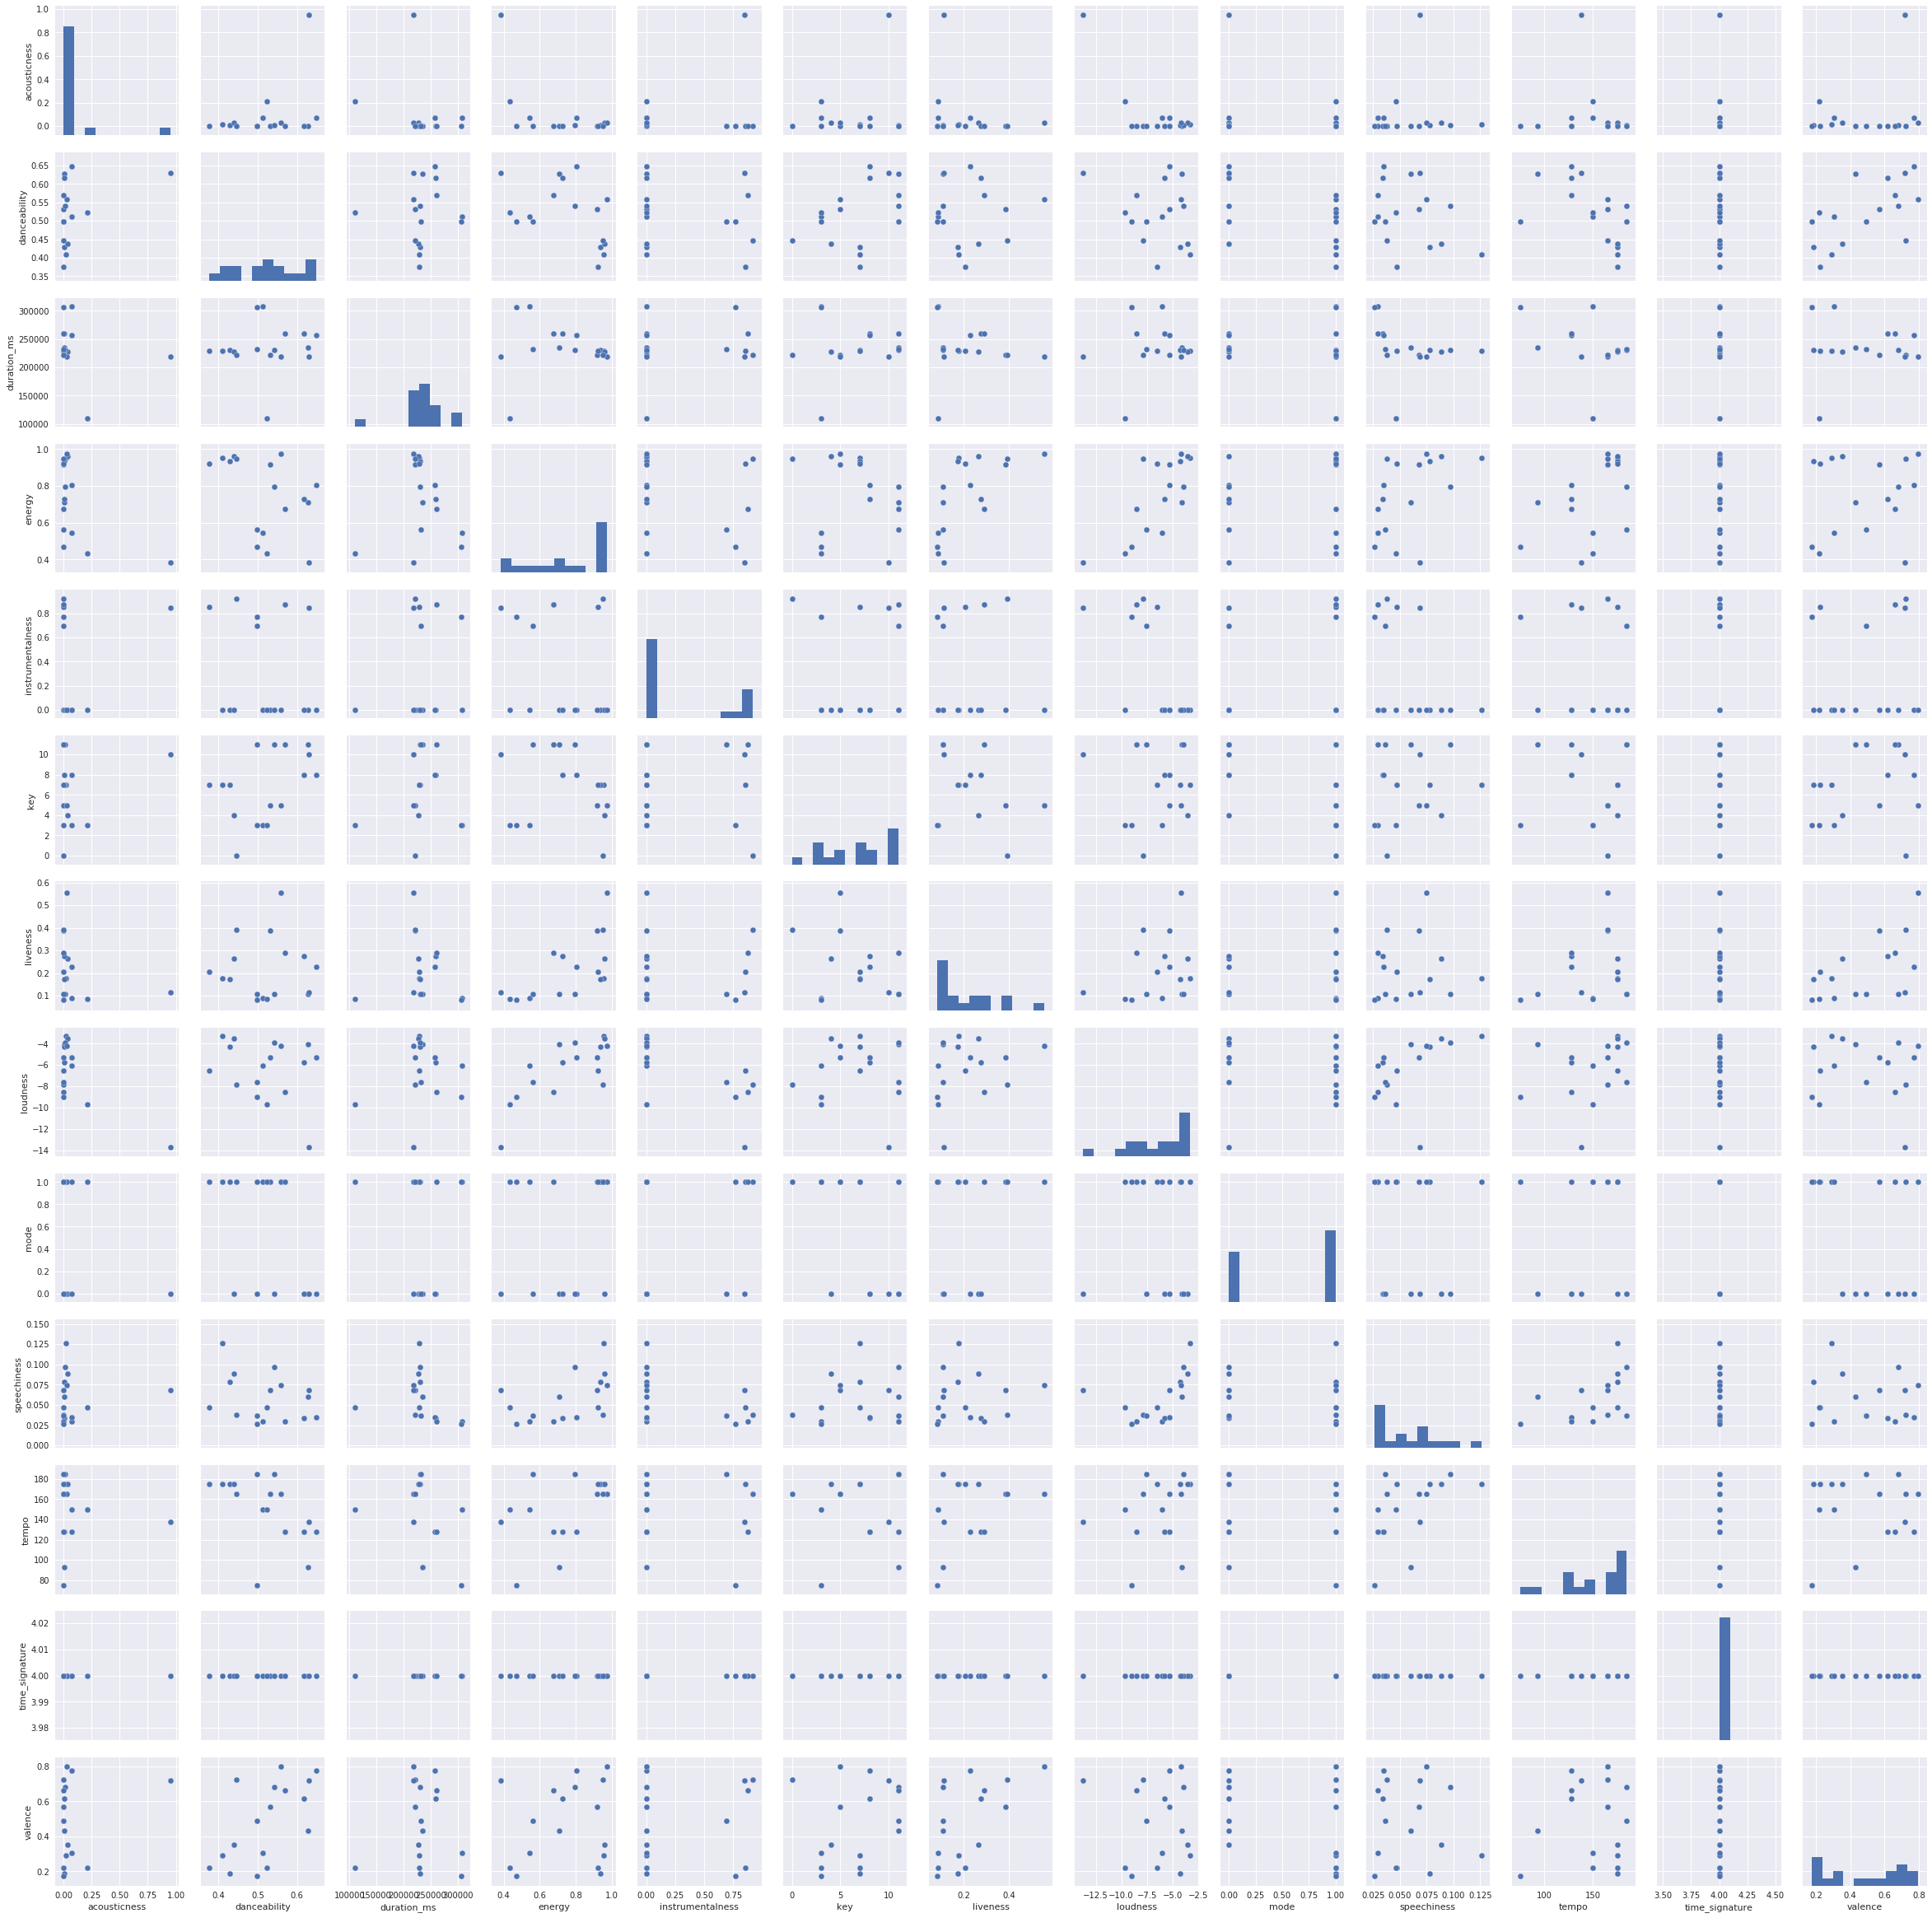

In [26]:
sns.pairplot(song_info)

## Correlation

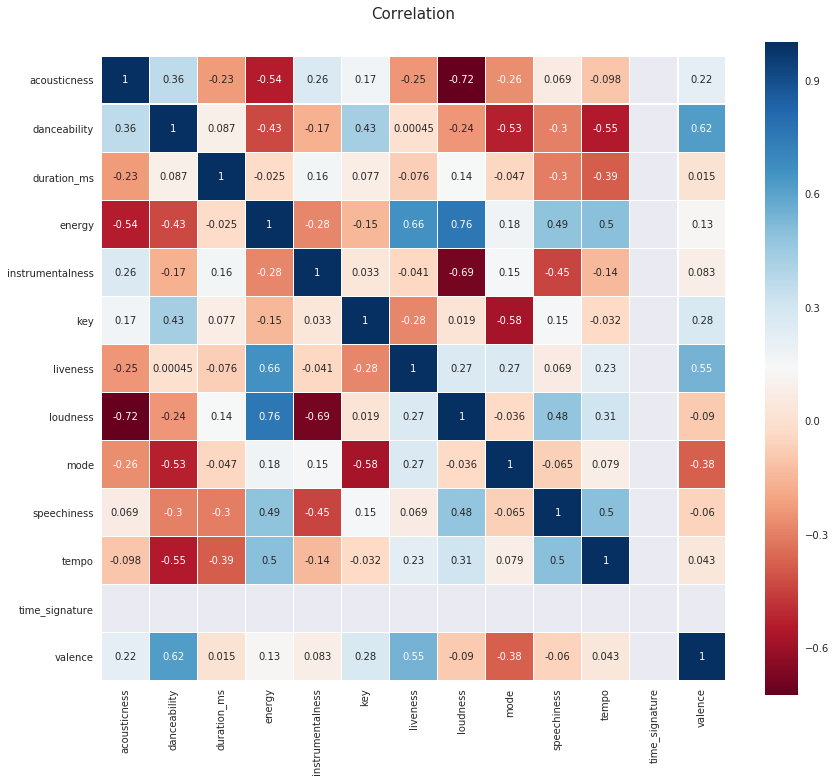

In [27]:
corr_mat = song_info.corr(method='pearson')
plt.figure(figsize=(14,12))
plt.title('Correlation', y=1.05, size=15)
colormap = plt.cm.RdBu
sns.heatmap(corr_mat,
            linewidths=0.1,
            cmap=colormap,
            vmax=1.0, 
            square=True, 
            annot=True)

## Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3755de7c50>,
      dtype=object)

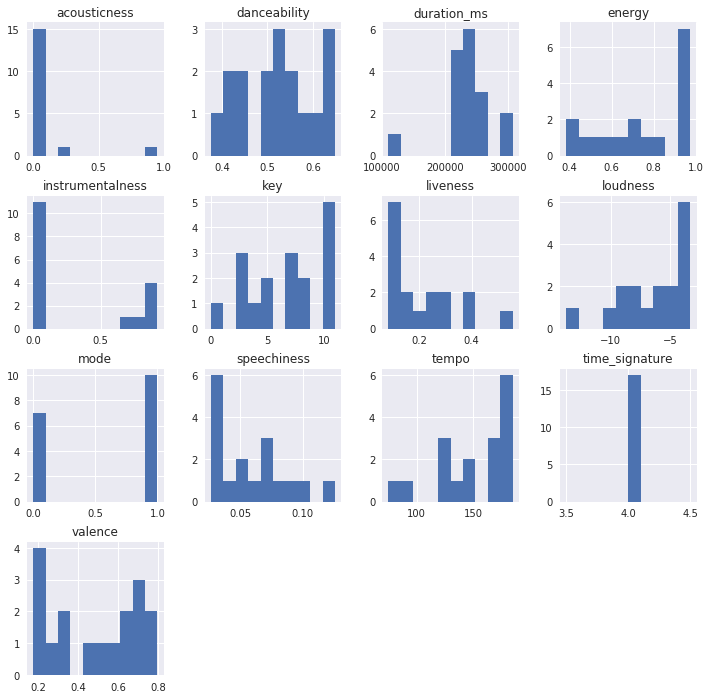

In [28]:
song_info.hist(figsize=(12, 12), bins=10)

## Graph of each data

In [29]:
valence = pd.DataFrame(song_info_all["name"])
valence["valence"] = song_info_all["valence"]
valence.head(20)

,name,valence
0,最高速 Fall in Love,0.291
1,奏(かなで),0.304
2,Da-Da-Dash!,0.432
3,最高速Fall in Love - ミーアver.,0.186
4,最高速Fall in Love,0.354
5,My Sweet Feelings,0.617
6,キスミーだぁりん▽,0.570
7,My Sweet Feelings,0.774
8,Da-Da-Dash!,0.682
9,最高速 Fall in Love - Instrumental,0.223


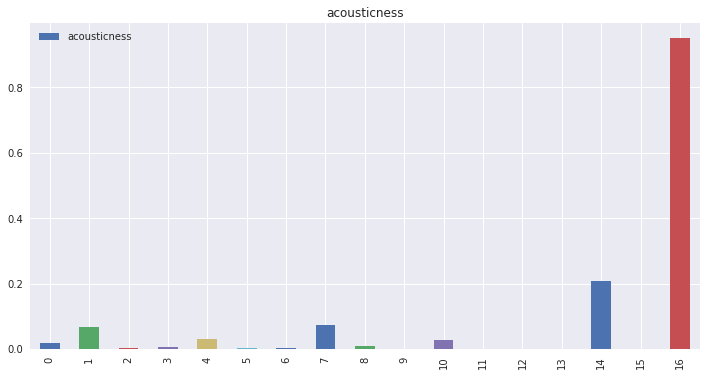

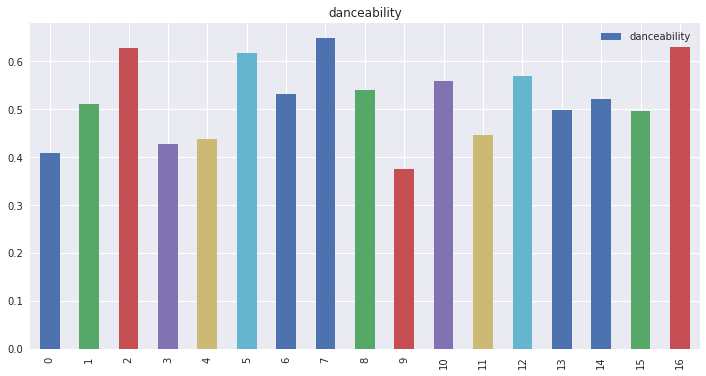

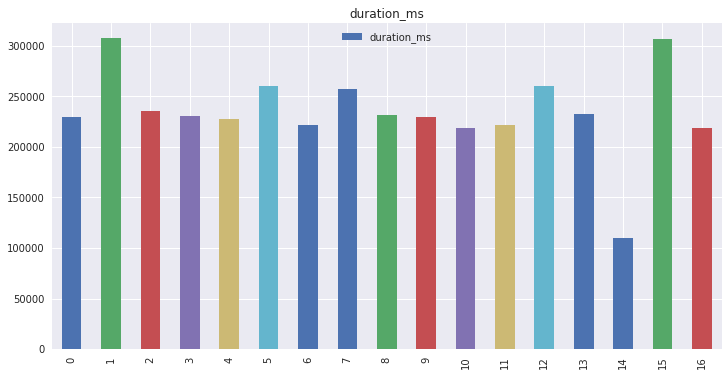

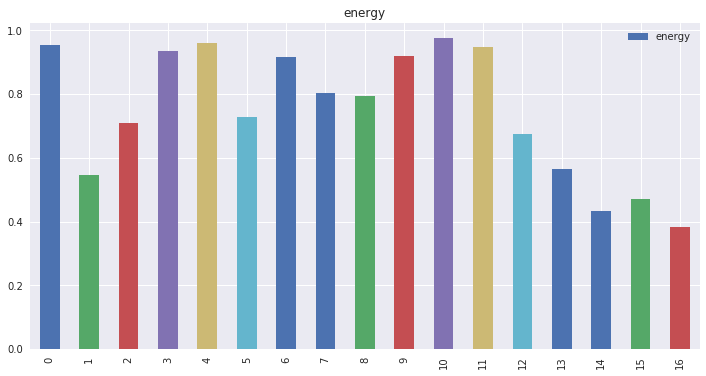

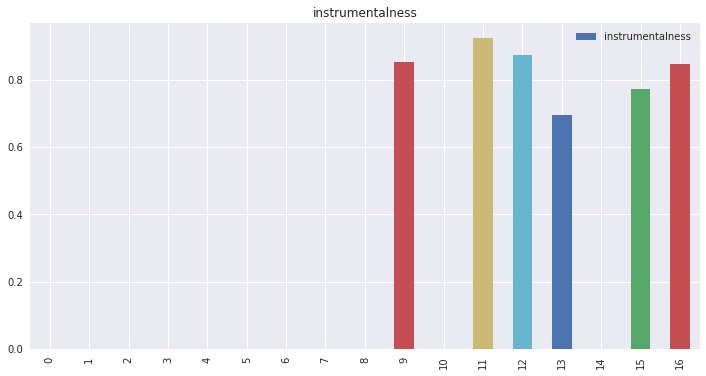

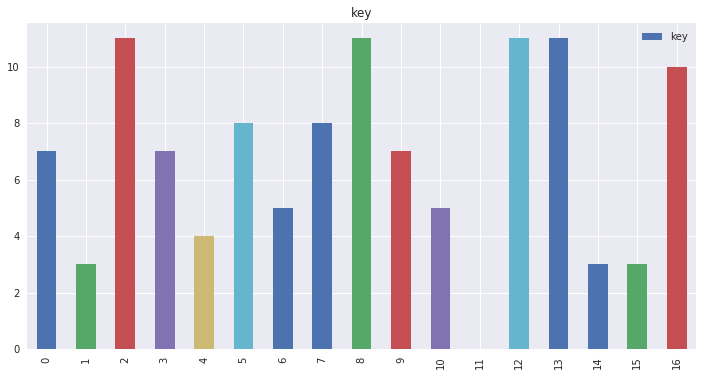

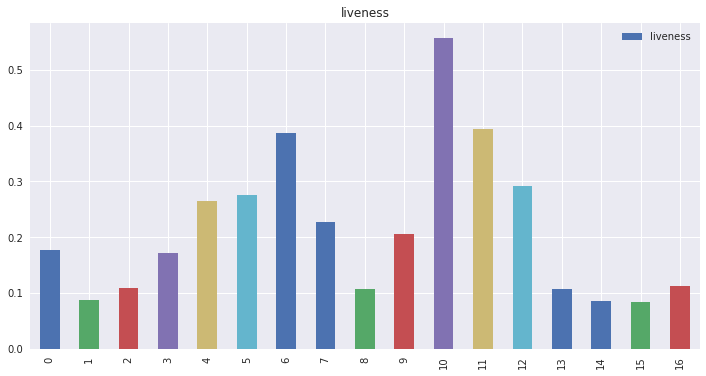

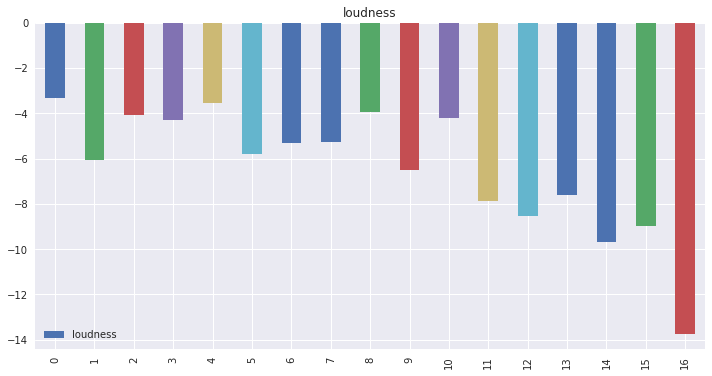

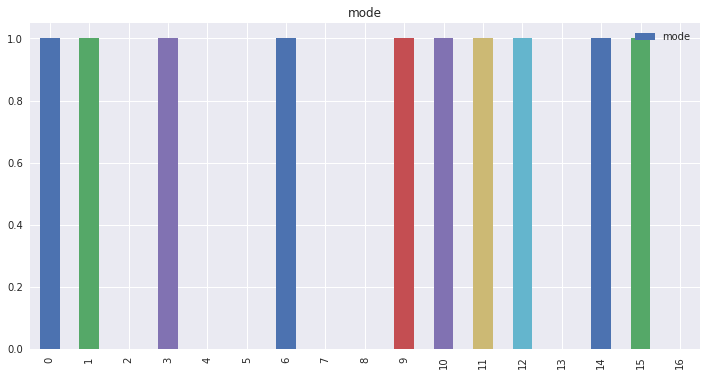

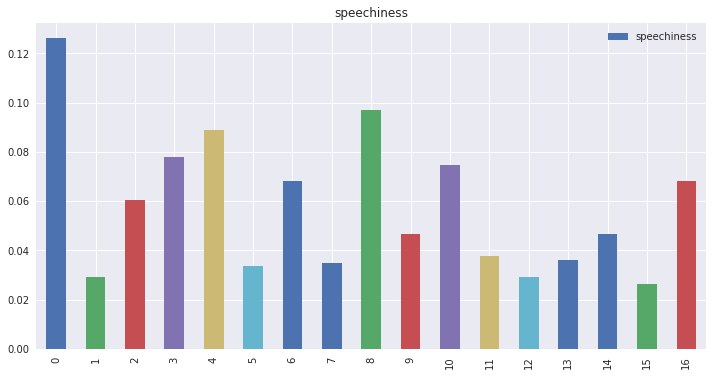

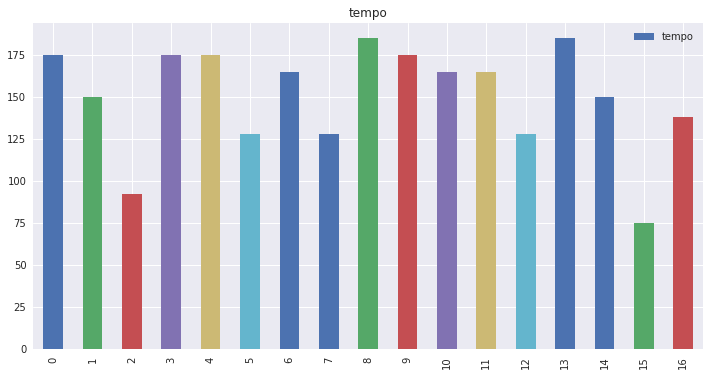

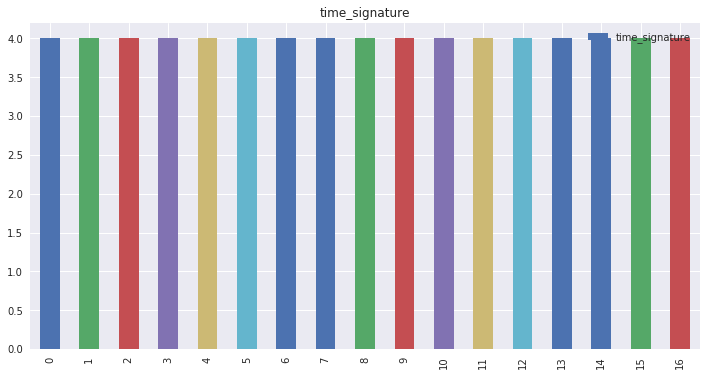

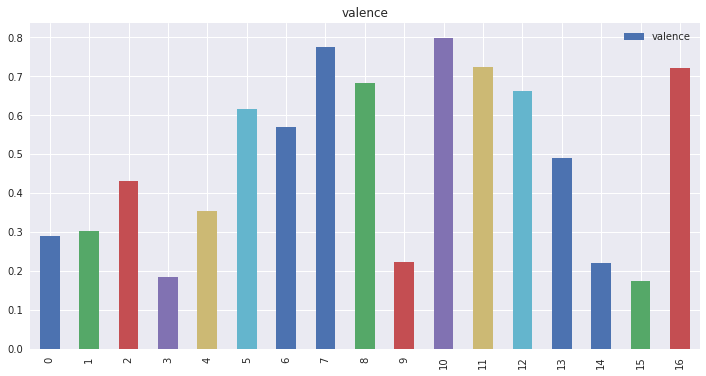

In [30]:
colum_name = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", "loudness", "mode", "speechiness", "tempo", "time_signature", "valence"]

for name in colum_name:
    song_info.plot.bar(y=name, figsize=(12,6))
    plt.title(name)